## DATA1030 Fall 2025 FInal Project

## Name: Moonhee Kim

## Link to your project github repo: https://github.com/moonheekim6/data1030-fall2025-final-presentation

### Setup

In [47]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


### Read in data

In [123]:
# your code here
# import the necessary packages. feel free to use pandas or polars, 
# matplotlib, and sklearn
import pandas as pd
import polars as pl
import numpy as np
import matplotlib as plt
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
import sklearn

# read in the dataset
df = pd.read_csv('/Users/moonheekim/Downloads/f25/data1030-fall2025-final-presentation/data/food_order.csv')

In [49]:
# check
# print("feature mat shape:", X.shape)
# print("target var shape:", y.shape)

# your code here
# copy-paste the PS3 1a Q0-4 EDA questions here (modify as needed) and 
# answer them.

In [50]:
print(df.columns)

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


In [51]:
# rows and columns do in the dataframe?
print(f'Number of rows: {df.shape[0]}')
print(f'Number of cols: {df.shape[1]}')

Number of rows: 1898
Number of cols: 9


In [60]:
# data types of the columns
pd.set_option('display.max_rows', None) 
print(df.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
has_rating                 int64
dtype: object


In [53]:
# <feature variable exploration>

# .describe or .value_counts

In [127]:
# feature engineer target variable into binary
df['has_rating'] = df['rating'].apply(lambda x: 0 if x == 'Not given' else 1)

In [122]:
print((df['has_rating'] == 0).sum())
print((df['has_rating'] == 1).sum())

736
1162


In [124]:
# delete order_id and restaurant_name columns, as they're irrelevant to ML
df = df.drop(columns=['order_id','restaurant_name'])

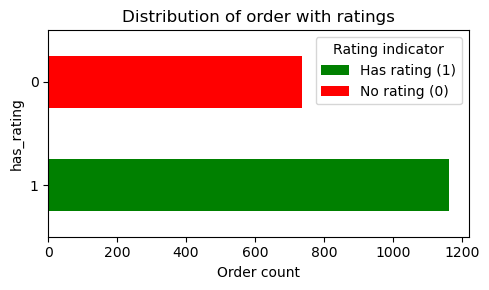

In [106]:
# visualize target variable

plt.figure(figsize=(5,3))
bars = df['has_rating'].value_counts().plot.barh(color=['green', 'red'])
plt.legend(bars.containers[0], ['Has rating (1)','No rating (0)'], title='Rating indicator')
plt.xlabel('Order count')
plt.ylabel('has_rating')
plt.title('Distribution of order with ratings')
plt.tight_layout()
plt.show()

### EDA

In [56]:
# customer id

# 1200 customers, 1898 examples
print(f"Number of unique customers: {df['customer_id'].nunique()}")

Number of unique customers: 1200


Number of restaurants: 178


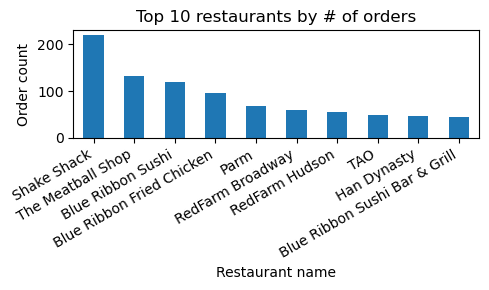

In [57]:
# restaurant name

# 178 restaurants, 1898 examples
print(f"Number of restaurants: {df['restaurant_name'].nunique()}")

restaurant_counts = df['restaurant_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5,3))
restaurant_counts.head(10).plot.bar() # top 10

plt.title('Top 10 restaurants by # of orders')
plt.xlabel('Restaurant name')
plt.ylabel('Order count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


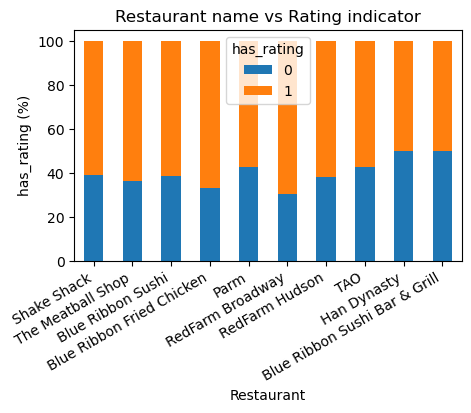

In [79]:
# restaurant name correlation
df_top10 = df[df['restaurant_name'].isin(restaurant_counts.head(10).index)]
rating_counts = df_top10.groupby(['restaurant_name', 'has_rating']).size().unstack(fill_value=0)
rating_counts = rating_counts.loc[rating_counts.sum(axis=1).sort_values(ascending=False).index]
rating_percent = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

rating_percent.plot(kind='bar', stacked=True, figsize=(5,3))
plt.xlabel('Restaurant')
plt.ylabel('has_rating (%)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Restaurant name vs Rating indicator')
plt.show()


<Figure size 500x300 with 0 Axes>

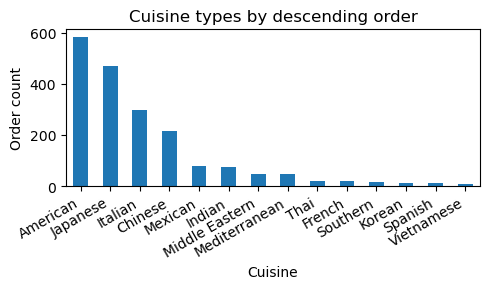

In [22]:
# cuisine types, descending

plt.figure(figsize=(5,3))

cuisine_counts = df['cuisine_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5,3))
cuisine_counts.plot.bar()

plt.title('Cuisine types by descending order')
plt.xlabel('Cuisine')
plt.ylabel('Order count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [108]:
print(cuisine_counts)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


/var/folders/31/d2sls5md6973b5pq96vdqrsc0000gn/T/ipykernel_72743/4246447703.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_counts = df.groupby(['cuisine_type', 'has_rating']).size().unstack(fill_value=0)


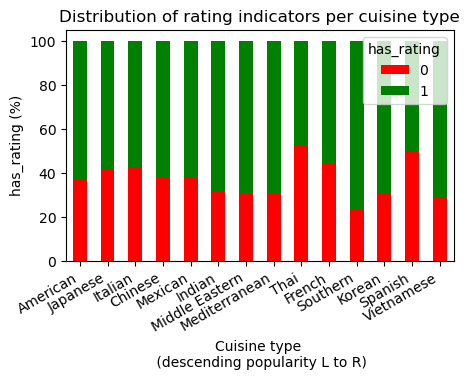

In [113]:
# cuisine type correlation
rating_counts = df.groupby(['cuisine_type', 'has_rating']).size().unstack(fill_value=0)
rating_counts = rating_counts.loc[rating_counts.sum(axis=1).sort_values(ascending=False).index]
rating_percent = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

rating_percent.plot(kind='bar', stacked=True, figsize=(5,3), color=['red','green'])
plt.xlabel('Cuisine type \n (descending popularity L to R)')
plt.ylabel('has_rating (%)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Distribution of rating indicators per cuisine type')
plt.show()

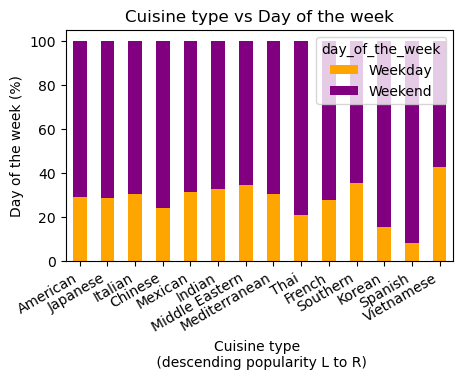

In [111]:
# cuisine type vs weekday/weekend

day_counts = df.groupby(['cuisine_type', 'day_of_the_week']).size().unstack(fill_value=0)
day_counts = day_counts.loc[day_counts.sum(axis=1).sort_values(ascending=False).index]
day_percent = day_counts.div(day_counts.sum(axis=1), axis=0) * 100

day_percent.plot(kind='bar', stacked=True, figsize=(5,3), color=['orange','purple'])
plt.xlabel('Cuisine type \n (descending popularity L to R)')
plt.ylabel('Day of the week (%)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Cuisine type vs Day of the week')
plt.show()

<Figure size 500x300 with 0 Axes>

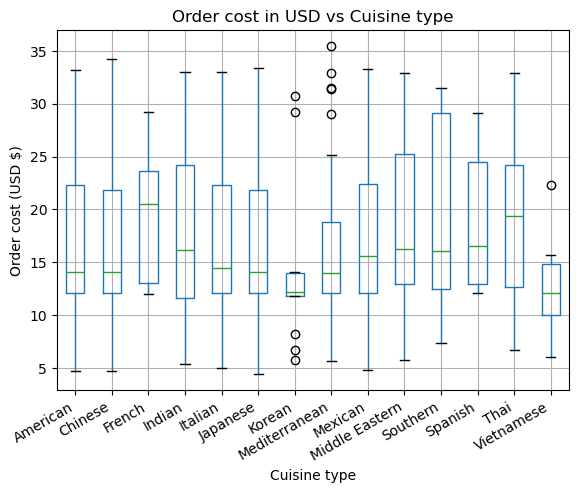

In [84]:
# cuisine type vs order cost

plt.figure(figsize=(5,3))
df.boxplot(by='cuisine_type', column='cost_of_the_order')
plt.xlabel('Cuisine type')
plt.ylabel('Order cost (USD $)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Distribution of cost ')
plt.show()

In [125]:
df['total_time'] = df['food_preparation_time']+df['delivery_time']

<Figure size 500x300 with 0 Axes>

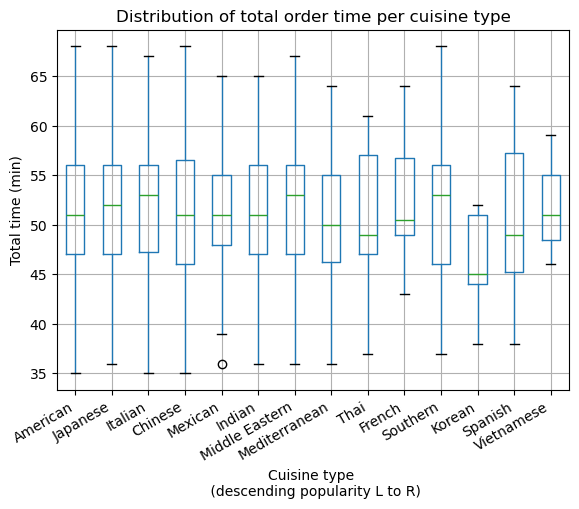

In [115]:
# cuisine type vs food prep time + delivery time

cuisine_order = df['cuisine_type'].value_counts().index
df['cuisine_type'] = pd.Categorical(df['cuisine_type'], categories=cuisine_order, ordered=True)

plt.figure(figsize=(5,3))
df.boxplot(by='cuisine_type', column='total_time')
plt.xlabel('Cuisine type \n (descending popularity L to R)')
plt.ylabel('Total time (min)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Distribution of total order time per cuisine type')
plt.show()

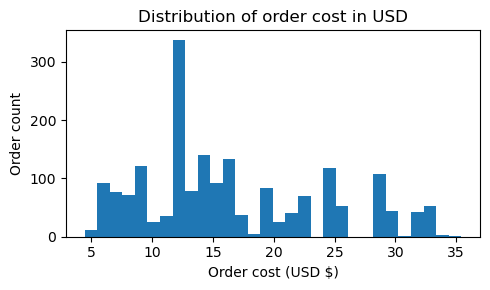

In [27]:
# order cost

plt.figure(figsize=(5,3))
df['cost_of_the_order'].plot.hist(bins = 30)
plt.xlabel('Order cost (USD $)')
plt.ylabel('Order count')
plt.title('Distribution of order cost in USD')
plt.tight_layout()
plt.show()


<Figure size 500x300 with 0 Axes>

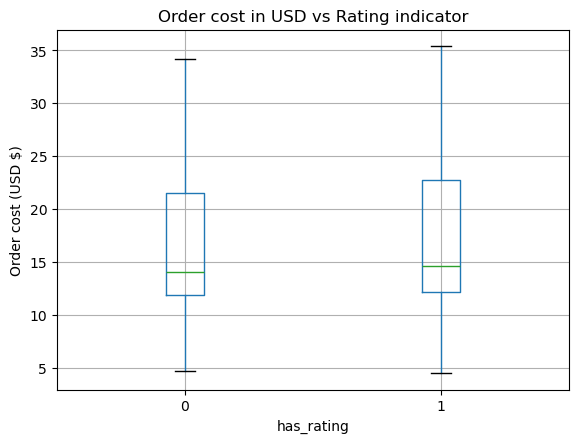

In [70]:
# order cost correlation
plt.figure(figsize=(5,3))
df.boxplot(by='has_rating', column='cost_of_the_order')
plt.xlabel('has_rating')
plt.ylabel('Order cost (USD $)')
plt.suptitle('')
plt.title('Order cost in USD vs Rating indicator')
plt.show()

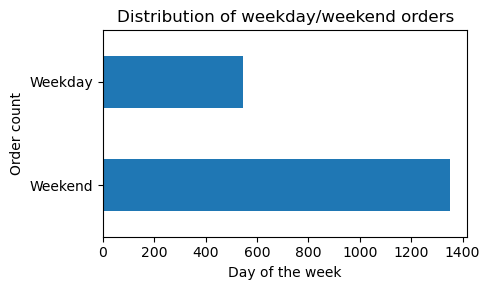

In [28]:
# day of the week
plt.figure(figsize=(5,3))
df['day_of_the_week'].value_counts().plot.barh()
plt.xlabel('Day of the week')
plt.ylabel('Order count')
plt.title('Distribution of weekday/weekend orders')
plt.tight_layout()
plt.show()


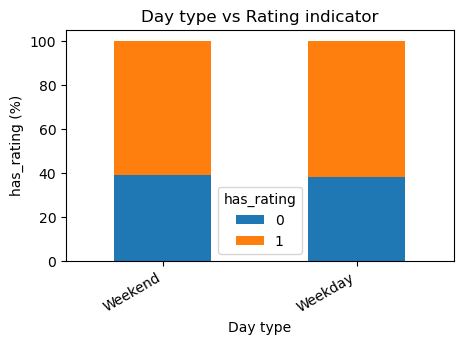

In [107]:
# weekend/weekday order day correlation
rating_counts = df.groupby(['day_of_the_week', 'has_rating']).size().unstack(fill_value=0)
rating_counts = rating_counts.loc[rating_counts.sum(axis=1).sort_values(ascending=False).index]
rating_percent = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

rating_percent.plot(kind='bar', stacked=True, figsize=(5,3))
plt.xlabel('Day type')
plt.ylabel('has_rating (%)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Day type vs Rating indicator')
plt.show()

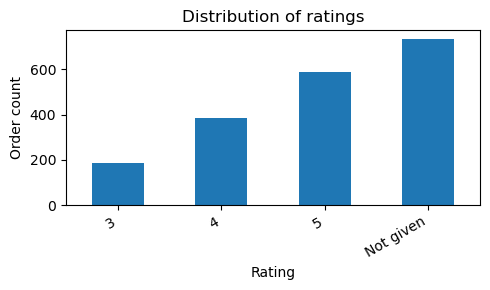

In [76]:
# rating
rating_counts = df['rating'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(5,3))
rating_counts.plot.bar()
plt.xlabel('Rating')
plt.ylabel('Order count')
plt.title('Distribution of ratings')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

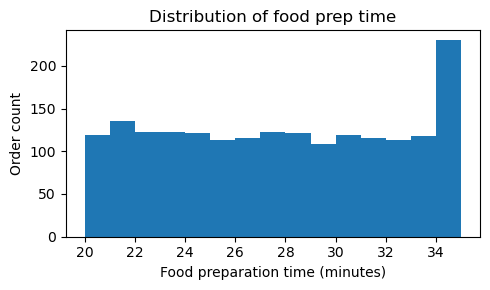

In [38]:
# food prep time

plt.figure(figsize=(5,3))
df['food_preparation_time'].plot.hist(bins = 15)
plt.xlabel('Food preparation time (minutes)')
plt.ylabel('Order count')
plt.title('Distribution of food prep time')

plt.tight_layout()
plt.show()


<Figure size 500x300 with 0 Axes>

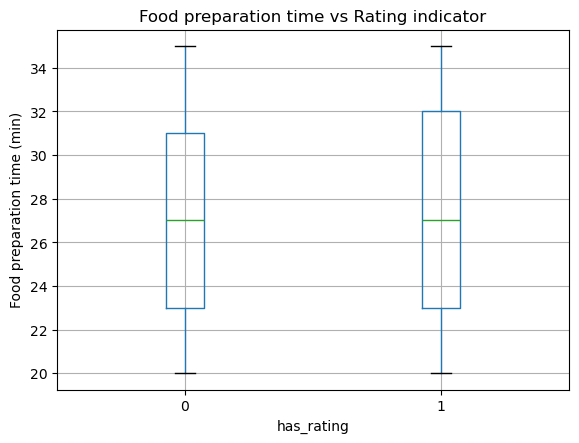

In [80]:
# food prep time correlation
plt.figure(figsize=(5,3))
df.boxplot(by='has_rating', column='food_preparation_time')
plt.xlabel('has_rating')
plt.ylabel('Food preparation time (min)')
plt.suptitle('')
plt.title('Food preparation time vs Rating indicator')
plt.show()

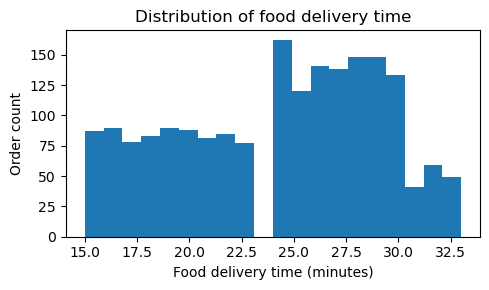

In [41]:
# food delivery time

plt.figure(figsize=(5,3))
df['delivery_time'].plot.hist(bins = 20)
plt.xlabel('Food delivery time (minutes)')
plt.ylabel('Order count')
plt.title('Distribution of food delivery time')

plt.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

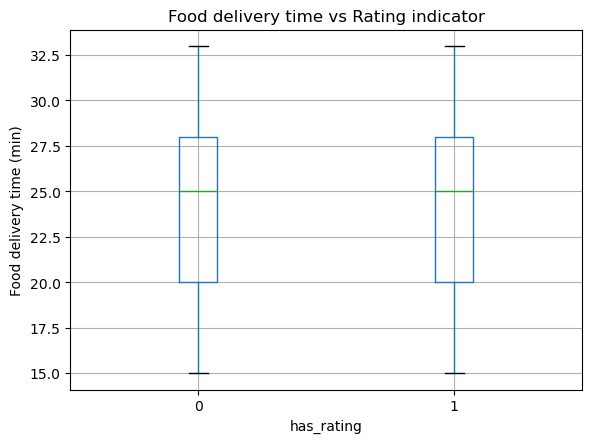

In [81]:
# food delivery time correlation
plt.figure(figsize=(5,3))
df.boxplot(by='has_rating', column='delivery_time')
plt.xlabel('has_rating')
plt.ylabel('Food delivery time (min)')
plt.suptitle('')
plt.title('Food delivery time vs Rating indicator')
plt.show()

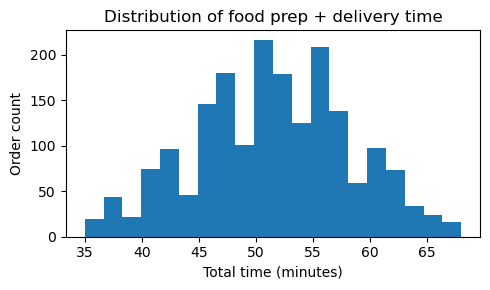

In [86]:
# total time

plt.figure(figsize=(5,3))
df['total_time'].plot.hist(bins = 20)
plt.xlabel('Total time (minutes)')
plt.ylabel('Order count')
plt.title('Distribution of food prep + delivery time')

plt.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

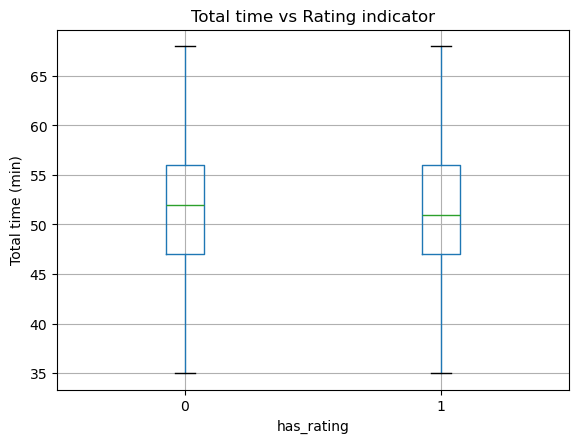

In [87]:
# total time correlation
plt.figure(figsize=(5,3))
df.boxplot(by='has_rating', column='total_time')
plt.xlabel('has_rating')
plt.ylabel('Total time (min)')
plt.suptitle('')
plt.title('Total time vs Rating indicator')
plt.show()

## Data splitting

In [128]:
y = df['has_rating']
X = df.drop(columns=['has_rating','rating','customer_id'])

In [129]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit

groups=df['customer_id']

splitter = GroupShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for i_other,i_test in splitter.split(X, y, groups):
    X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
    X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]


In [130]:
print(X_test.shape)
print(X_other.shape)

(375, 6)
(1523, 6)


In [136]:
kf = GroupKFold(n_splits=4)
for fold, (train_idx, val_idx) in enumerate(kf.split(X_other, y_other, groups_other)):
    X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
    y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]
    
    print(f"Fold {fold+1}:")
    print(f"X_train shape = {X_train.shape}, X_val shape = {X_val.shape}")
    print()

Fold 1:
X_train shape = (1142, 6), X_val shape = (381, 6)

Fold 2:
X_train shape = (1142, 6), X_val shape = (381, 6)

Fold 3:
X_train shape = (1142, 6), X_val shape = (381, 6)

Fold 4:
X_train shape = (1143, 6), X_val shape = (380, 6)



## Preprocessing

In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

continuous_ftrs = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'total_time']
categorical_ftrs = ['cuisine_type', 'day_of_the_week']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'),\
           categorical_ftrs),
        ('std', StandardScaler(), continuous_ftrs)])

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

print(f"Train shape: {X_train_processed.shape}")
print(f"Validation shape: {X_val_processed.shape}")
print(f"Validation shape: {X_test_processed.shape}")

Train shape: (1143, 20)
Validation shape: (380, 20)
Validation shape: (375, 20)
